### Name: C. J. Kurukulasuriya
### Index No.:190337X

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Coordinates after gradient descent:
 x =  2.80784852176135 f(x) =  0.036922190589299575


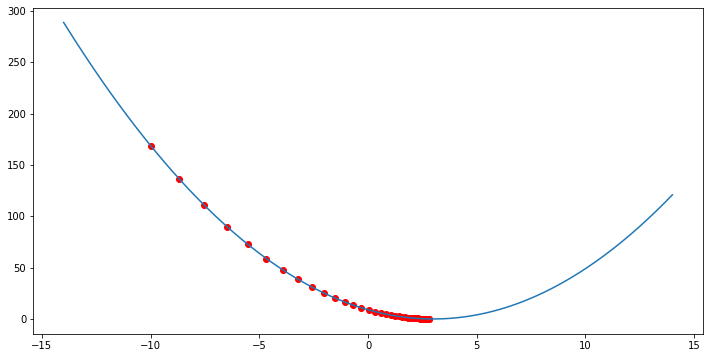

In [2]:
# function
def f(x):
    return x**2 - 6*x + 9

# gradient
def g(x):
    return 2*x - 6

# Lr
alpha = 0.05

# starting point
x = -10

# initial point
x_hist = np.array(x)
fx_hist = np.array(f(x))

# run gradient descent loop 40 times
for i in range(40):
    x -= alpha*g(x)
    x_hist = np.append(x_hist, x)
    fx_hist = np.append(fx_hist, f(x))

# Coordinates after gradient descent
print("Coordinates after gradient descent:\n", 'x = ', x, 'f(x) = ', f(x))

# show results
delta = 0.1
x_ = np.arange(-14, 14 + delta, delta)

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)
ax.plot(x_, f(x_))
ax.scatter(x_hist, fx_hist, c='r')
plt.show()


## Q1)

In [3]:
# function
def f(x):
    w = np.array([1, -1, -12, 15, 5])  # coefficients of polynomial
    M = np.size(w)-1  # last index of w (w[M] is coeff of the constant term)

    w = np.flip(w)
    return np.sum([w[i]*(x**i) for i in range(0, M+1)], axis = 0)


# derivative
def g(x):
    w = np.array([1, -1, -12, 15, 5])
    M = np.size(w)-1

    w = np.flip(w)
    return np.sum([i*w[i]*(x**(i-1)) for i in range(0, M+1)], axis = 0)

In [4]:

# gradient descent
def grad_descent(x, lr):
    x_hist = np.array(x)
    fx_hist = np.array(f(x))

    for _ in range(20):
        x -= lr*g(x)
        x_hist = np.append(x_hist, x)
        fx_hist = np.append(fx_hist, f(x))

    return x_hist, fx_hist


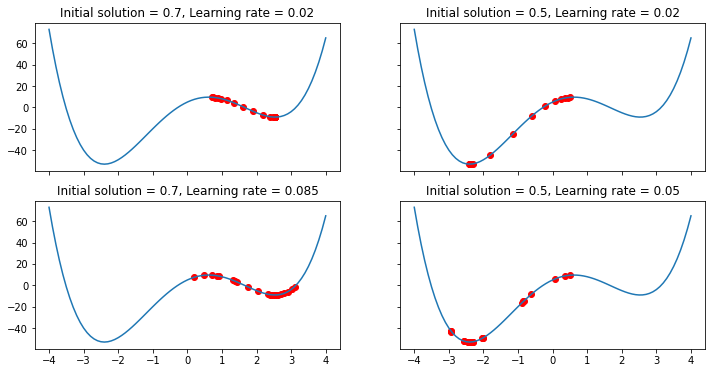

In [5]:
# starting values
x = [0.7, 0.5, 0.7, 0.5]

# learning rates
alpha = [0.02, 0.02, 0.085, 0.05]

x_hist = []
fx_hist = []

for i in range(4):
    xs, fxs = grad_descent(x[i], alpha[i]) # see function def above
    x_hist.append(xs)
    fx_hist.append(fxs)

x_hist = np.array(x_hist)
fx_hist = np.array(fx_hist)

fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharex=True, sharey=True)

delta = 0.1
x_ = np.arange(-4, 4 + delta, delta)

for i in range(4):
    axs[i//2][i%2].plot(x_, f(x_))
    axs[i//2][i%2].scatter(x_hist[i], fx_hist[i], c='r')
    axs[i//2][i%2].set_title(f"Initial solution = {x[i]}, Learning rate = {alpha[i]}")

plt.show()

In [17]:
# minimum coordinate is obtained for case 2
x_hist, fx_hist = grad_descent(0.5, 0.02)

# Coordinates after gradient descent
print("Coordinates of the minimum:\n", '  x = ', x_hist[-1], '\nf(x) = ', fx_hist[-1])

Coordinates of the minimum:
   x =  -2.400403139786586 
f(x) =  -53.11840483801493


### a) Initial solution matters:
We can see from the topmost two plots, when the initial solution was changed from 0.7 to 0.5, the minimum values they reach are different. When it is 0.5, a better minimum has been reached.

### b) Learning rate is important to tune:
From the bottom two graphs we can see that the for both cases, when the learning rate is increased from the previous value of 0.02, the values have overshoot without getting stabilized at the minimum point. 

Hence, both the inital solution and tuning the learning rate is important.

In [7]:
#finding root closest to x0 using built-in functions
from scipy.optimize import fsolve
from scipy.optimize import minimize

x0 = -1.5

root = fsolve(g, x0) # stationary point of f, closest to x0
print(root)

minimum = minimize(f, x0) # minimum point of f, closest to x0
print(minimum) 


[-2.40040314]
      fun: -53.11840483801492
 hess_inv: array([[0.01679189]])
      jac: array([-1.43051147e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-2.40040315])


## Q2)

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, mnist
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [9]:
# Utility function for displaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)

     # For dispaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train =>", x_train . shape)

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072  # CIFAR10 32x32x3
# Din = 784 # MINIST
x_train = x_train[range(Ntr), :]
x_test = x_test[range(Nte), :]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]

x_train => (50000, 32, 32, 3)


In [14]:
K = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train, (Ntr, Din)).astype(np.float32)
x_test = np.reshape(x_test, (Nte, Din)).astype(np.float32)
x_train /= 255.
x_test /= 255.

std = 1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
lr = 1e-3
lr_decay = 0.1
epochs = 11
batch_size = 1000
loss_hist = []
rng = np.random.default_rng(seed=0)

for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]

        # forward pass
        y_pred = x@w + b
        loss = 1./batch_size*np.square(y_pred-y).sum()
        loss_hist.append(loss)

        # backward pass
        dy_pred = 1./batch_size * (2.0*(y_pred - y))
        dw = x.T @ dy_pred
        db = dy_pred.sum(axis=0)*1
        w = w - lr*dw  # dw is daba L/daba w
        b = b - lr*db

    if e % 5 == 0:
        print("Iteration %d/%d: loss %f" % (e+1, epochs, loss))
    if e % 10 == 0:
        lr *= lr_decay


Iteration 1/11: loss 0.850458
Iteration 6/11: loss 0.836763
Iteration 11/11: loss 0.834914


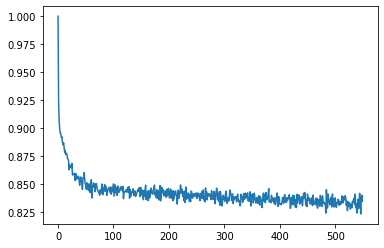

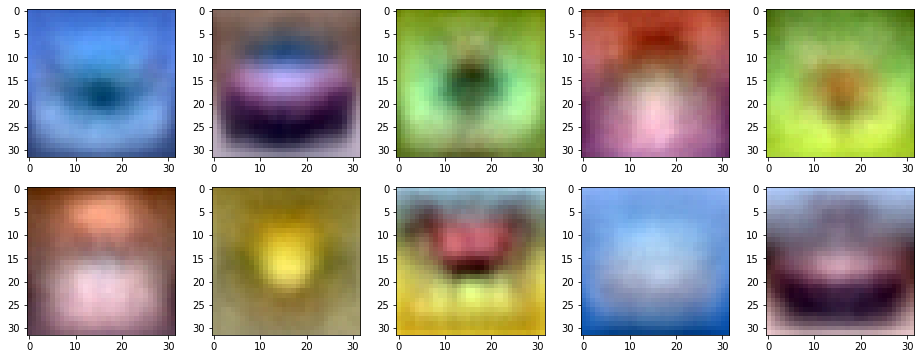

train_acc =  0.33558
test_acc =  0.335


In [15]:
y_train_pred = x_train.dot(w) + b
y_test_pred = x_test.dot(w) + b
display(y_train,y_test,y_train_pred,y_test_pred,loss_hist,w,showim=True)